In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# display all the columns in the dataset
pd.pandas.set_option('display.max_columns',None)

In [3]:
# reading train and test data

train = pd.read_csv('train.csv')


In [4]:
# 1st 5 rows of train data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# shape 
train.shape

(1460, 81)

In [6]:
# basic information about train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# statistical information
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# null values
nan_values_train = [feature for feature in train.columns if train[feature].isnull().any() == True]
print(nan_values_train)
len(nan_values_train)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


19

##### 19 columns with missing values

In [9]:
# percentage of null values
for feature in nan_values_train:
    print(feature,':', round(train[feature].isnull().sum()/len(train)*100,2))

LotFrontage : 17.74
Alley : 93.77
MasVnrType : 0.55
MasVnrArea : 0.55
BsmtQual : 2.53
BsmtCond : 2.53
BsmtExposure : 2.6
BsmtFinType1 : 2.53
BsmtFinType2 : 2.6
Electrical : 0.07
FireplaceQu : 47.26
GarageType : 5.55
GarageYrBlt : 5.55
GarageFinish : 5.55
GarageQual : 5.55
GarageCond : 5.55
PoolQC : 99.52
Fence : 80.75
MiscFeature : 96.3


In [10]:
# reading test file
test = pd.read_csv('test.csv')

In [11]:
# 1st 5 rows of test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
# shape
test.shape

(1459, 80)

In [13]:
# basic information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [14]:
# nan values
nan_values_test = [feature for feature in test.columns if test[feature].isnull().any() == True]
print(nan_values_test)
len(nan_values_test)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


33

##### in test data we have 33 columns with missing values

In [15]:
# percentage of null values
for feature in nan_values_test:
    print(feature,':', round(train[feature].isnull().sum()/len(train)*100,2))

MSZoning : 0.0
LotFrontage : 17.74
Alley : 93.77
Utilities : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.55
MasVnrArea : 0.55
BsmtQual : 2.53
BsmtCond : 2.53
BsmtExposure : 2.6
BsmtFinType1 : 2.53
BsmtFinSF1 : 0.0
BsmtFinType2 : 2.6
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
KitchenQual : 0.0
Functional : 0.0
FireplaceQu : 47.26
GarageType : 5.55
GarageYrBlt : 5.55
GarageFinish : 5.55
GarageCars : 0.0
GarageArea : 0.0
GarageQual : 5.55
GarageCond : 5.55
PoolQC : 99.52
Fence : 80.75
MiscFeature : 96.3
SaleType : 0.0


In [16]:
# print('Features and there repestive categories/classes for training data and testing data:')
# for feature in cat_col:
#     for j in cat_col_test:
#         print('{} : {},{}'.format(feature,len(df[feature].unique()),len(df_test[feature].unique())))
#         break

#### combining training and testing data for better EDA and Preprocessing

In [17]:

df = train.append(test)

In [18]:
df.shape

(2919, 81)

#### Null/ nan/ missing values

In [19]:
nan_values = [feature for feature in df.columns if (df[feature].isnull().any() == True and feature !='SalePrice')]
print(nan_values)
len(nan_values)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


34

In [20]:
# percentage of missing values 
for feature in nan_values:
    print(f'{feature} : {round(df[feature].isnull().sum()*100/len(df),4)}')

MSZoning : 0.137
LotFrontage : 16.6495
Alley : 93.2169
Utilities : 0.0685
Exterior1st : 0.0343
Exterior2nd : 0.0343
MasVnrType : 0.8222
MasVnrArea : 0.7879
BsmtQual : 2.7749
BsmtCond : 2.8092
BsmtExposure : 2.8092
BsmtFinType1 : 2.7064
BsmtFinSF1 : 0.0343
BsmtFinType2 : 2.7407
BsmtFinSF2 : 0.0343
BsmtUnfSF : 0.0343
TotalBsmtSF : 0.0343
Electrical : 0.0343
BsmtFullBath : 0.0685
BsmtHalfBath : 0.0685
KitchenQual : 0.0343
Functional : 0.0685
FireplaceQu : 48.6468
GarageType : 5.3786
GarageYrBlt : 5.4471
GarageFinish : 5.4471
GarageCars : 0.0343
GarageArea : 0.0343
GarageQual : 5.4471
GarageCond : 5.4471
PoolQC : 99.6574
Fence : 80.4385
MiscFeature : 96.4029
SaleType : 0.0343


Observation: 
    
        here we will fill columns having less than 40% missing values with appropiate approach 
        and dropping columns with more than 40% missing values as if we fill it will mostly inappropiate data.
        
        Also we wont be dropping SalePrice as ofcourse there wont be any saleprice column in test data
        

In [21]:
# dropping those features whose null values are greater than 40%
for i in range(3):
    for feature in nan_values:
        if feature != 'SalePrice':
            if round(df[feature].isnull().sum()*100/len(df),4)>40:
                nan_values.remove(feature)
                df.drop(feature,axis=1, inplace=True)

In [22]:
print(nan_values)
len(nan_values)

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


29

In [23]:
# seperating categorical and numerical columns 
cat_col = df.select_dtypes(include='O').columns
print(cat_col)
print(len(cat_col))

num_col = df.select_dtypes(exclude='O').columns
print(num_col)
print(len(num_col))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
38
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYr

In [24]:
len(df.columns) == len(num_col) + len(cat_col)

True

In [25]:
# filling categorical nan values with mode
for i in range(3):
    for feature in nan_values:
        if feature in cat_col:
            df[feature] = df[feature].fillna(df[feature].mode()[0])
            nan_values.remove(feature)

In [26]:
print(nan_values)
len(nan_values)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


11

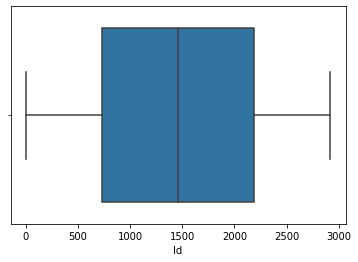

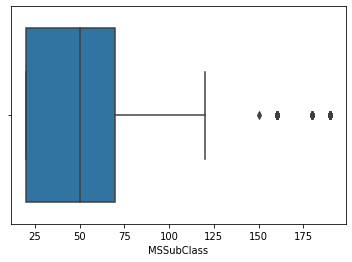

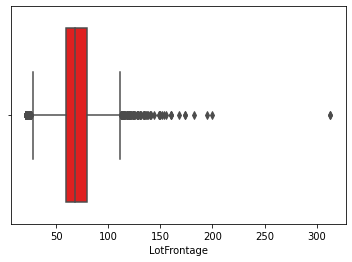

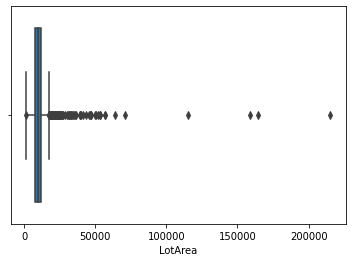

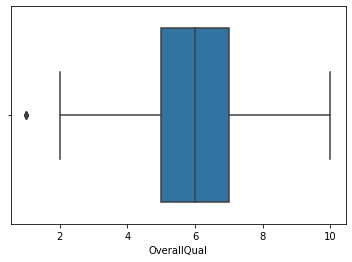

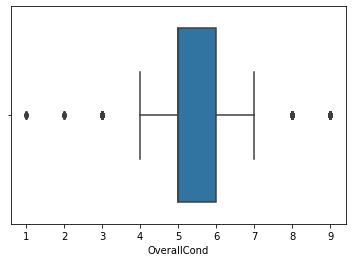

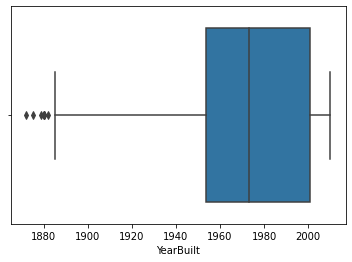

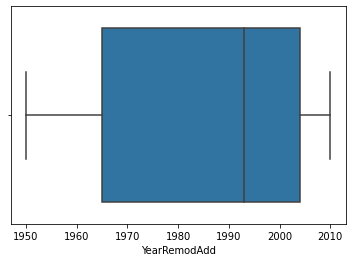

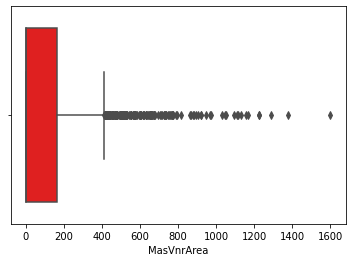

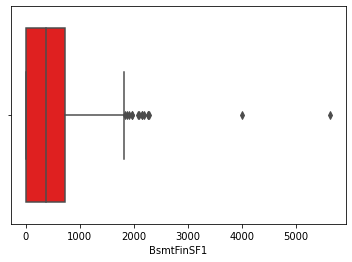

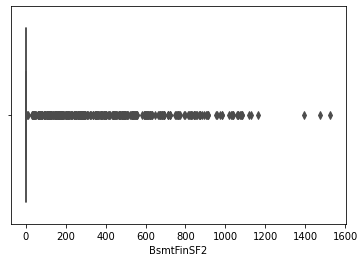

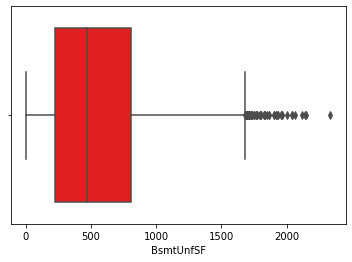

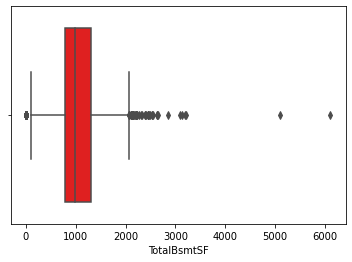

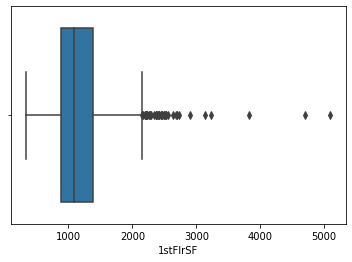

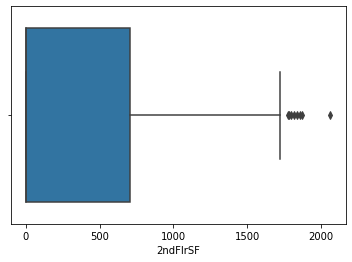

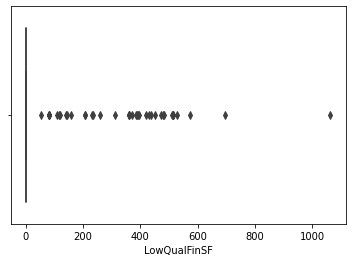

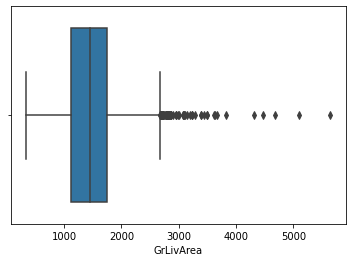

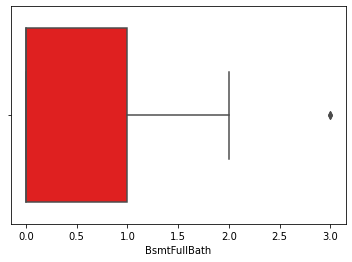

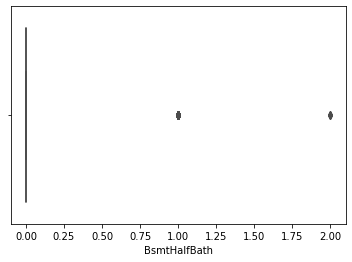

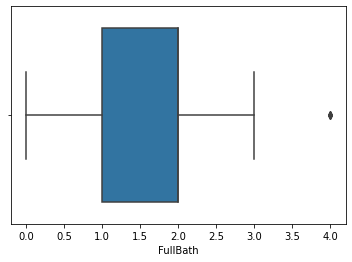

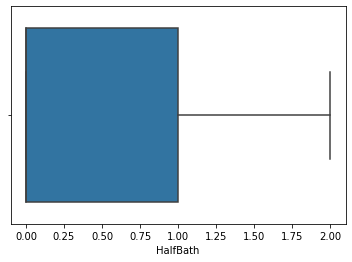

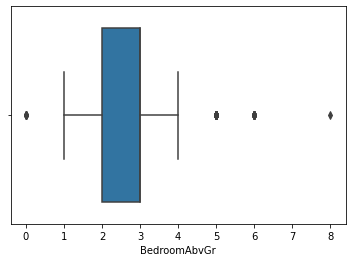

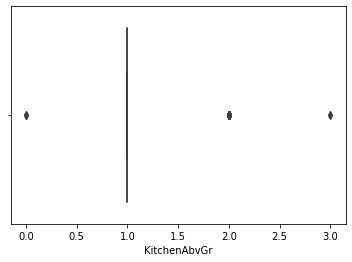

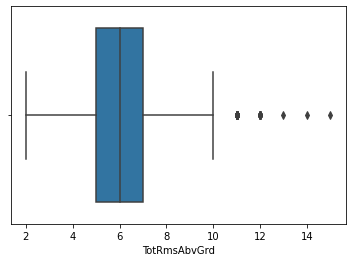

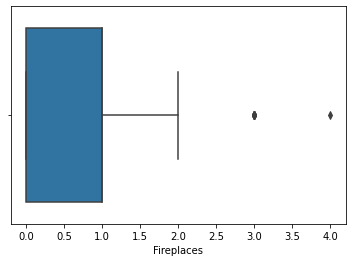

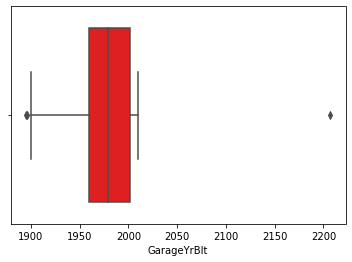

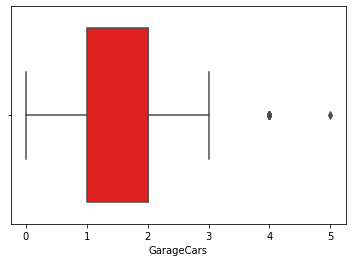

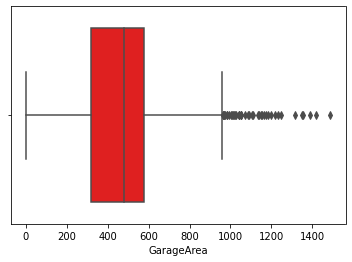

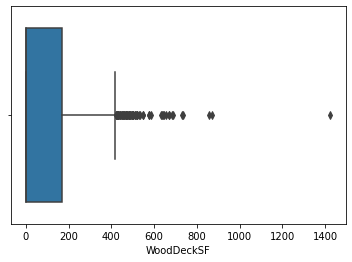

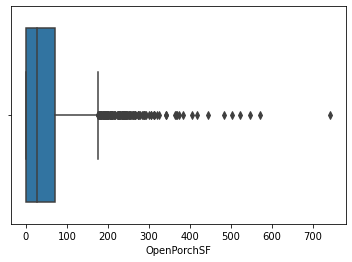

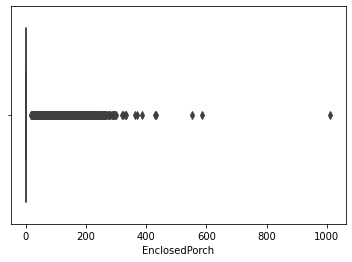

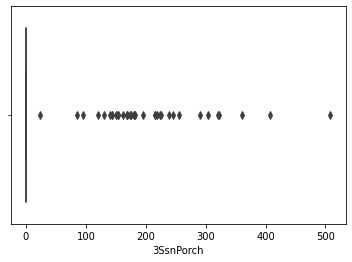

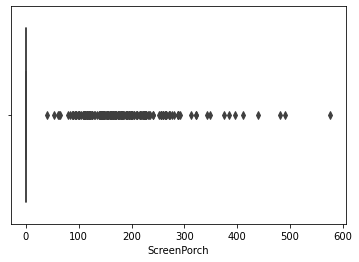

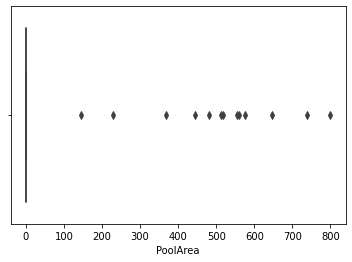

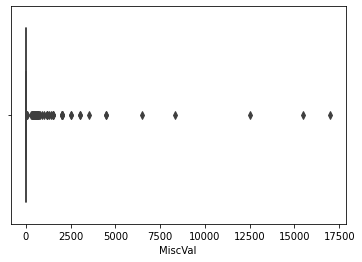

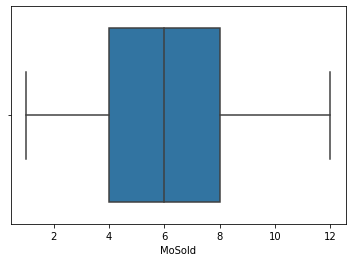

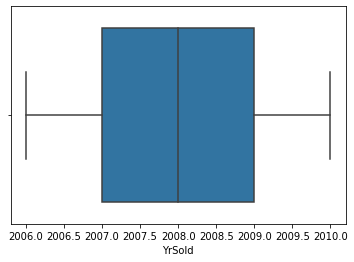

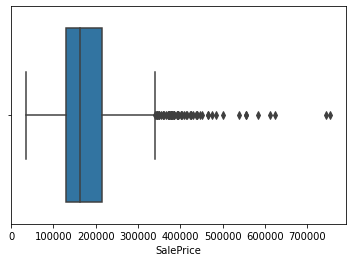

In [27]:
# checking outliers in numerical columns

for feature in num_col:
    # highlighting columns with nan values with red color
    if feature in nan_values:
        sns.boxplot(df[feature], color='RED')
        plt.show()
    # keeping default color for columns without nan values
    else:
        sns.boxplot(df[feature])
        plt.show()

Observations:
    
    For both features with missing values and features without misssing values have outliers present in it
    From point of view of  feautures with missing values we need to fill with median as mean will be shift towards the outliers. 

In [28]:
# filling numerical nan values with median
for i in range(4):
    for feature in nan_values:
        if feature in num_col:
            df[feature] = df[feature].fillna(df[feature].median())
            nan_values.remove(feature)

In [29]:
print(nan_values)
len(nan_values)

[]


0

In [30]:
df.isnull().sum().sum()

1459

1459  are null values from Saleprice of test.csv 

In [31]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


From observation, the dataset we have, has 4 year variables.Normally,  We  extract information from the datetime variables like no of years or no of days. One example in this specific scenaio can be difference in years between the year the house was built and house was sold.

In [32]:
year_feature = [feature for feature in num_col if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [33]:
# lets explore th content of these year variables
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905
 1907 1896 1902 1895 1879 1901]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931.

Text(0.5, 1.0, 'House Price Vs YearSold')

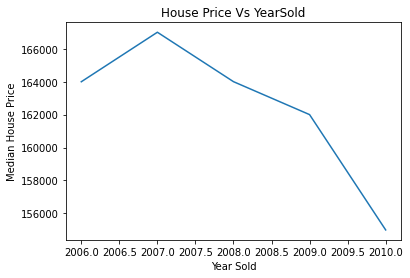

In [34]:
# we will check whether there is a relation between year the house is sold and SalePrice

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price Vs YearSold')

Observation:
    
    As the number of year increases house prices are decreasing
    But in reality it is completly oppositte

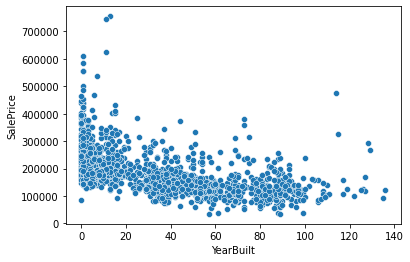

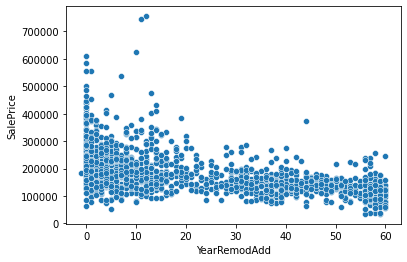

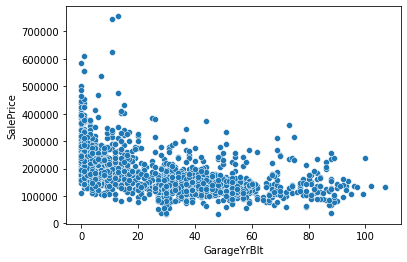

In [35]:
 ## Here we will compare the difference between All year features with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]
        sns.scatterplot(data[feature], data['SalePrice'])
#         plt.scatter(data[feature],data['SalePrice'])
#         plt.xlabel(feature)
#         plt.ylabel('SalePrice')
        plt.show()

Observations:

        For all the 3 graphs, The initial year's sale price is more than the later on price
        The price gradually decreases as it gets old

In [36]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in num_col if len(df[feature].unique())<25 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

discrete_feature

Discrete Variables Count: 14


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

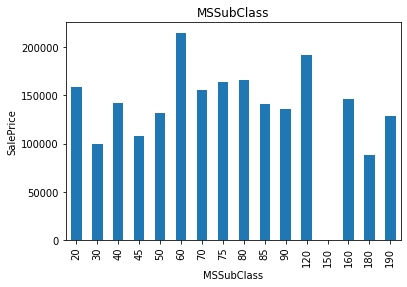

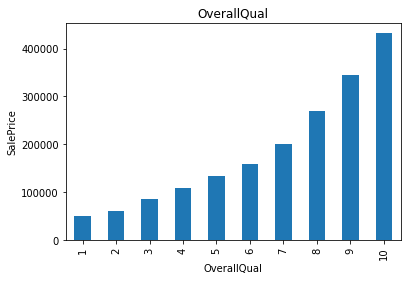

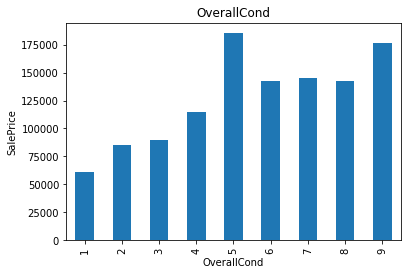

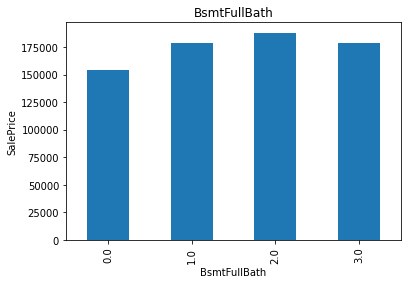

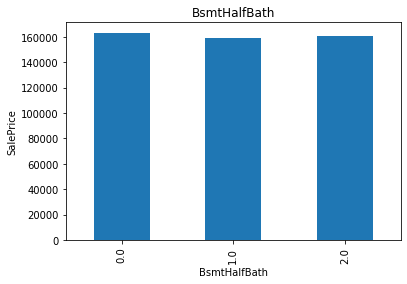

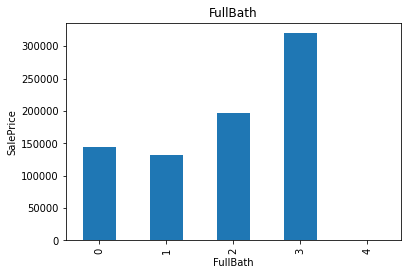

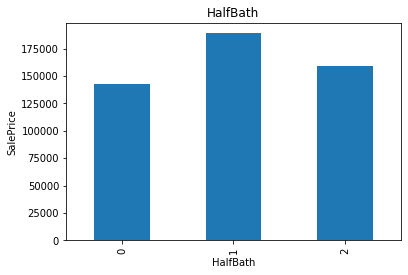

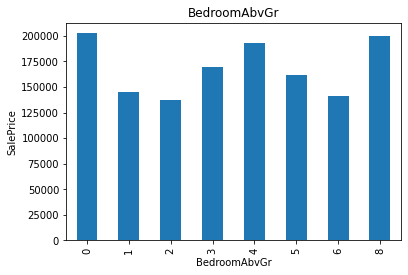

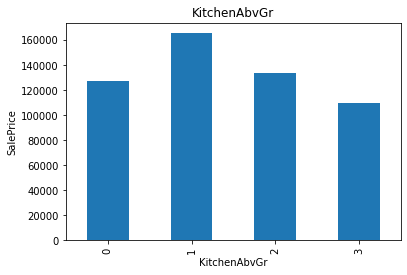

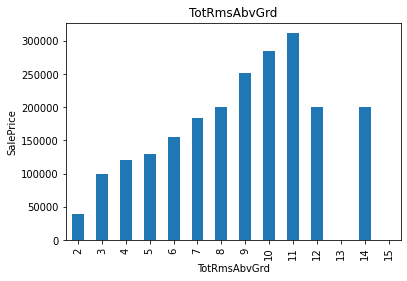

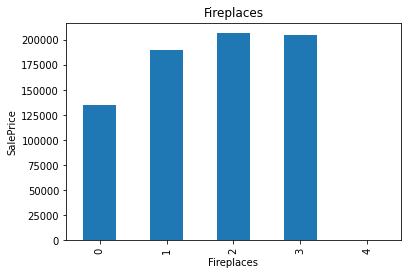

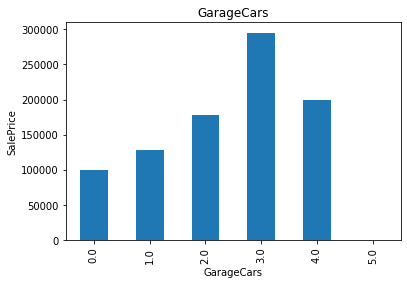

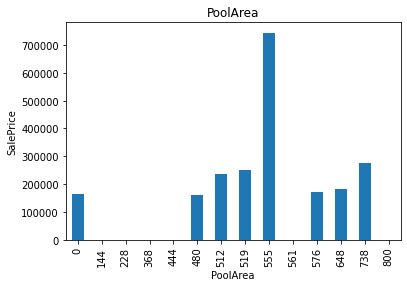

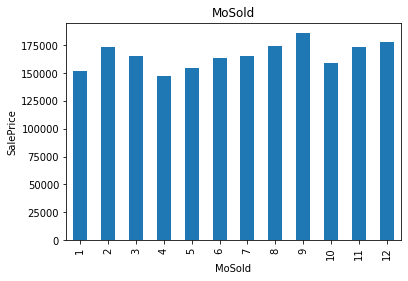

In [37]:
# relationship between descrete variable and saleprice

for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Observations:
    
    There are all descrete features like OverallQual, GarageCars which are clearly affecting the saleprice 
    except BsmtHalfBath which has no impact on saleprice

In [38]:
continuous_feature=[feature for feature in num_col if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


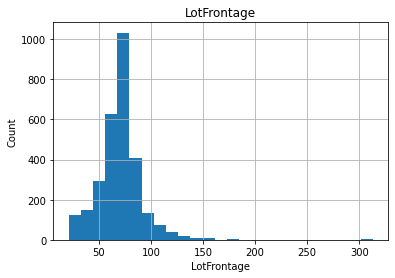

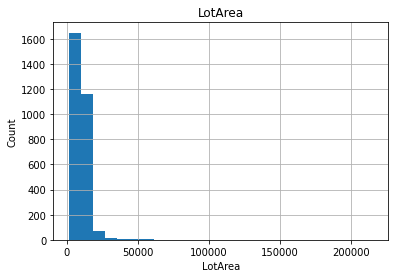

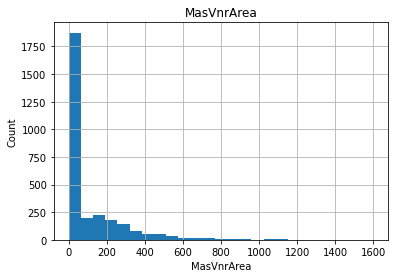

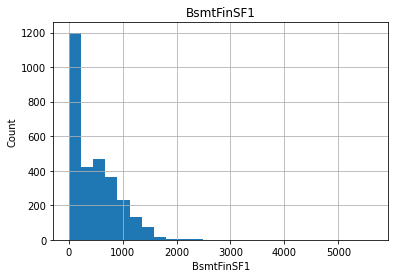

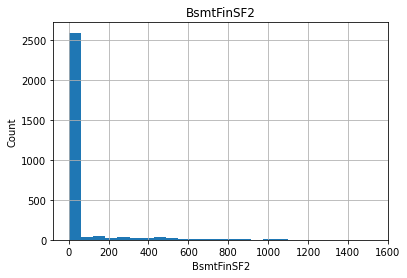

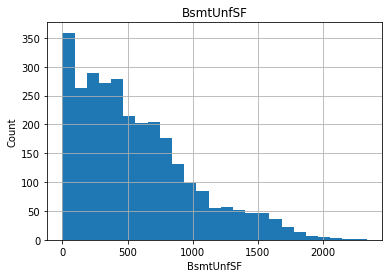

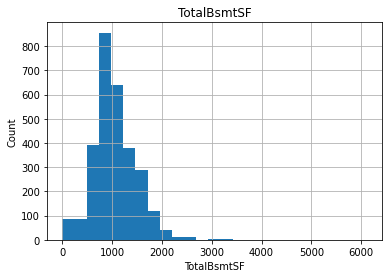

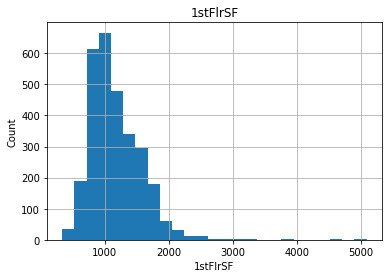

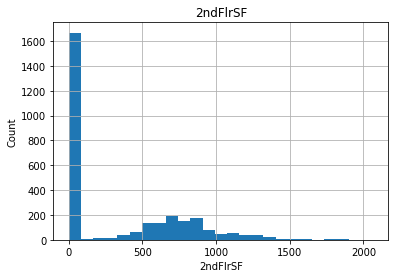

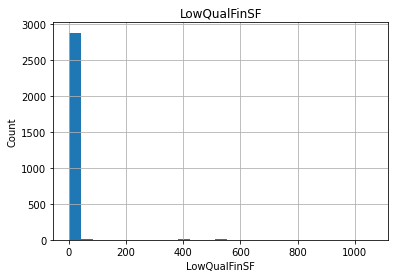

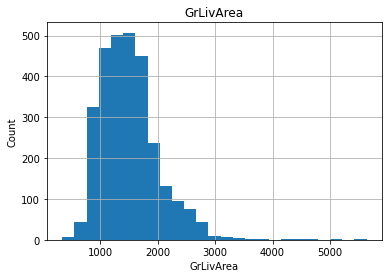

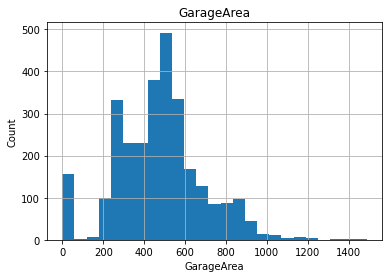

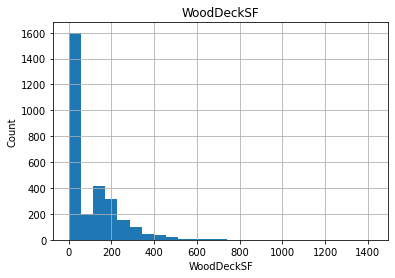

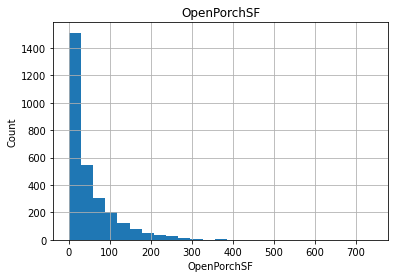

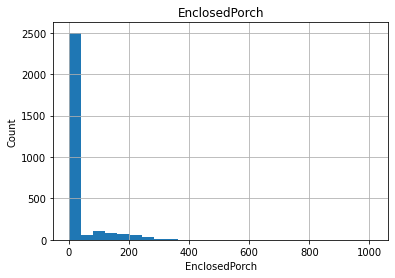

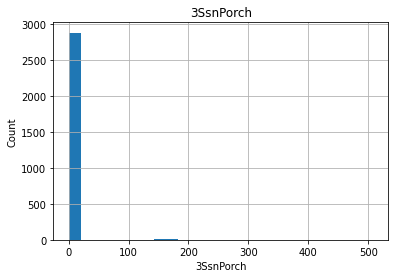

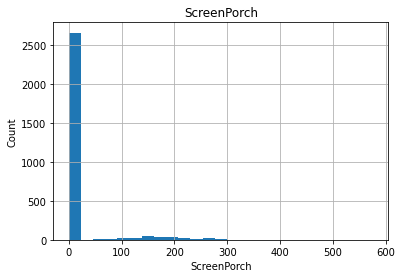

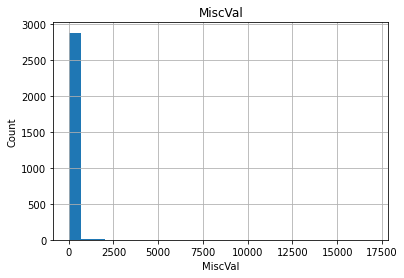

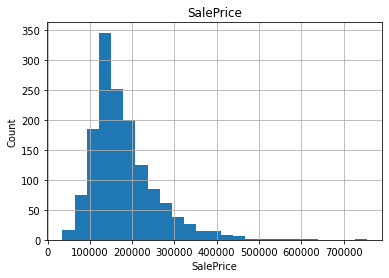

In [39]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Observations:
    
    all the histograms are right skewed. which means most of the values are concentrated at the left side of the graph and very less values are spreaded towards right side. 

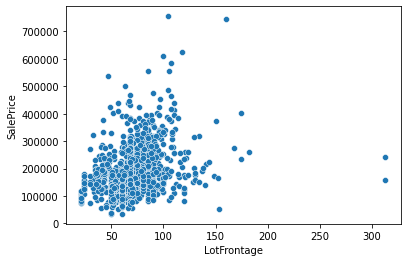

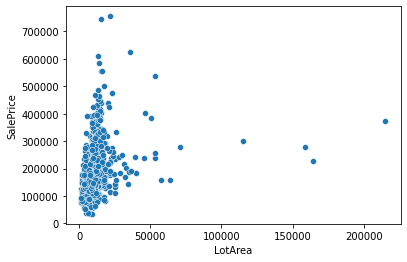

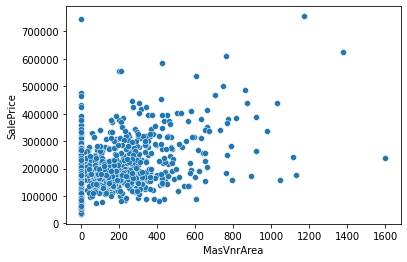

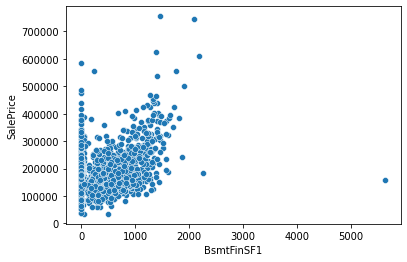

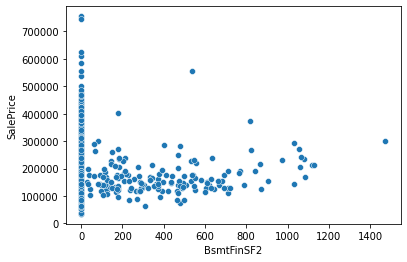

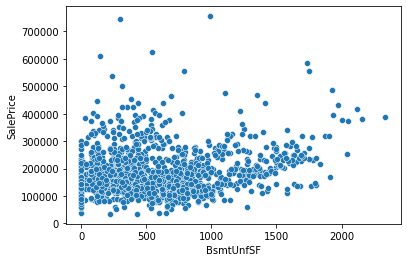

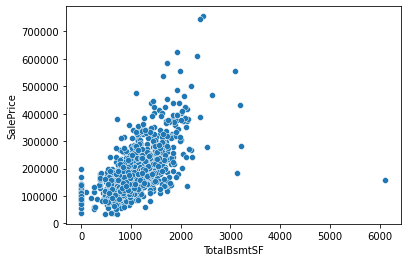

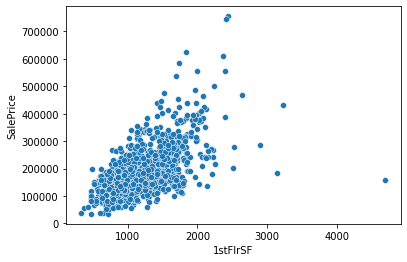

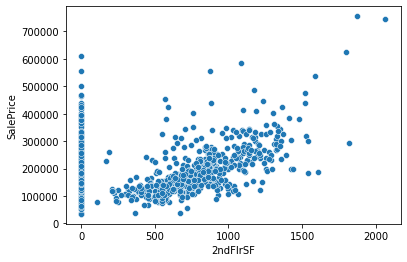

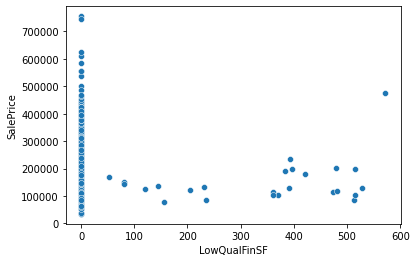

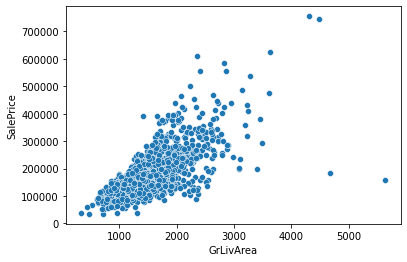

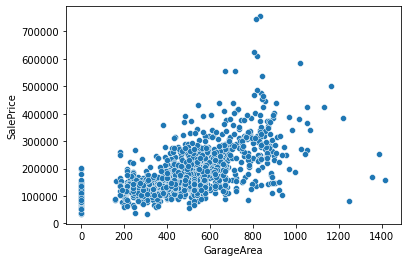

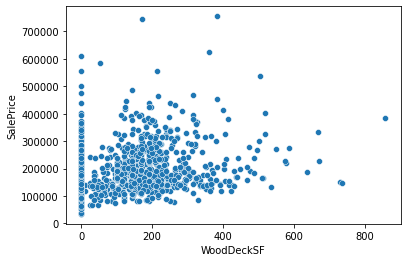

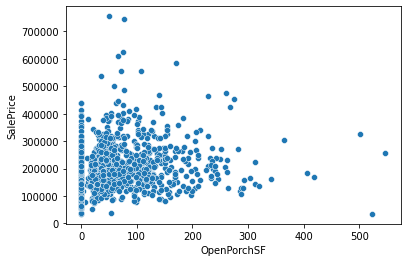

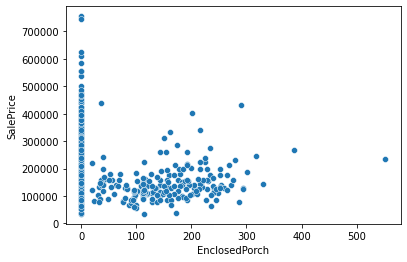

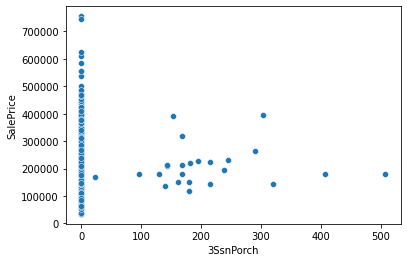

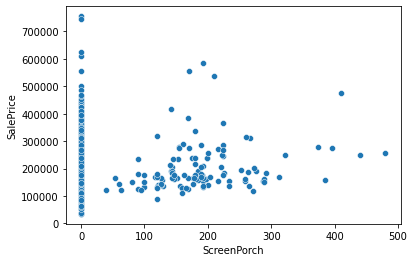

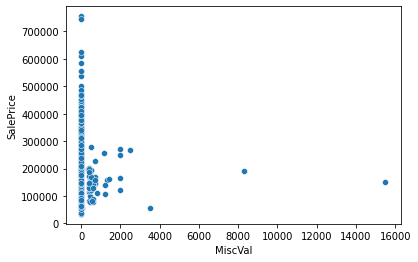

In [40]:
# relationship between continuous variables and SalePrice
for feature in continuous_feature:
    data = df.copy()
    if feature!='SalePrice':
        sns.scatterplot(data[feature], data['SalePrice'])
        plt.show()

Observations:
    
    there is relationship between continuous variable and SalePrice we can see that everygraph is  positively related to the SalePrice
    For each feature, as its value increases SalePrice is also increasing

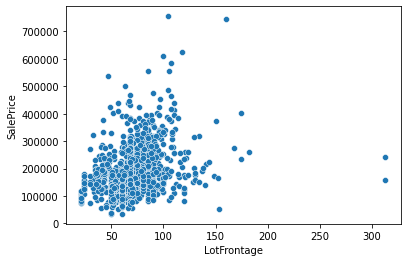

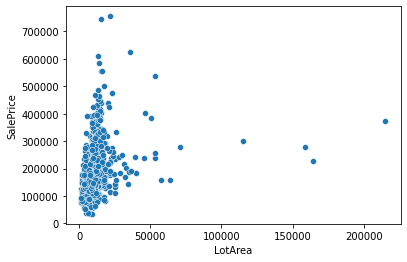

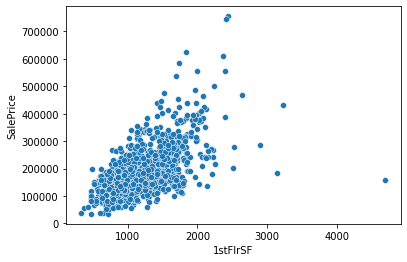

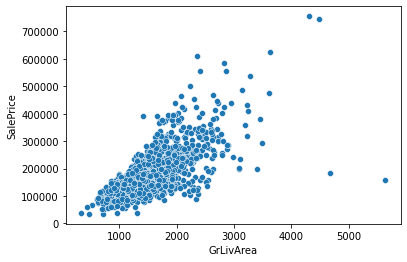

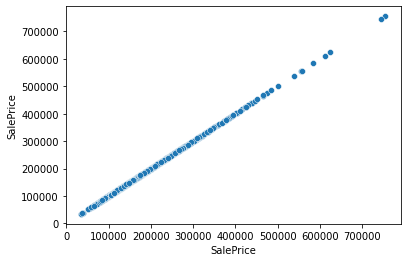

In [41]:
# features without having 0 value
for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        sns.scatterplot(data[feature], data['SalePrice'])
        plt.show()

Observations:
    
    All the features are clearly positively related to salePrice which dont have 0 value in it.

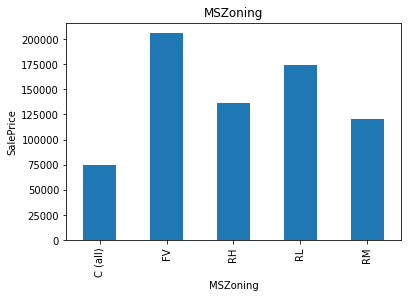

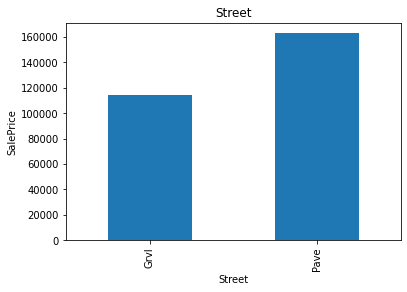

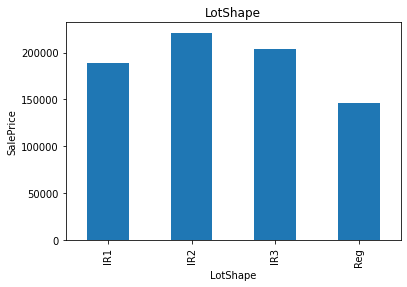

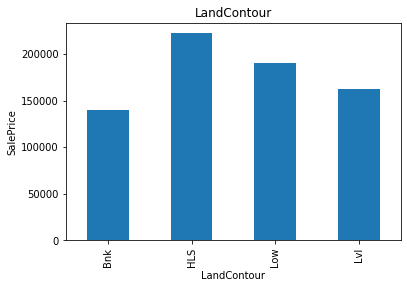

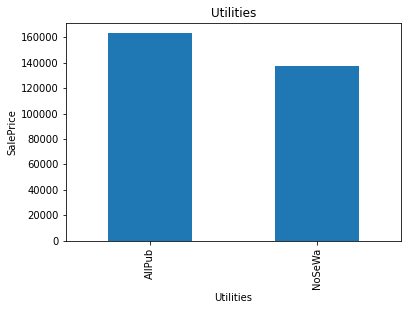

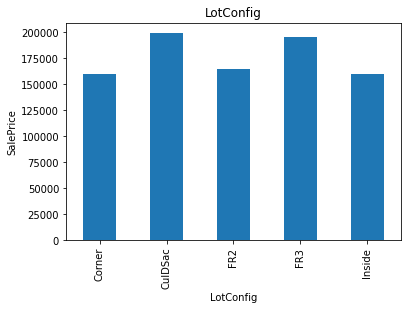

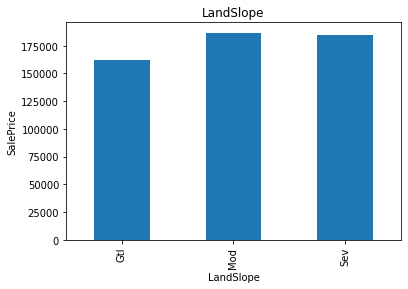

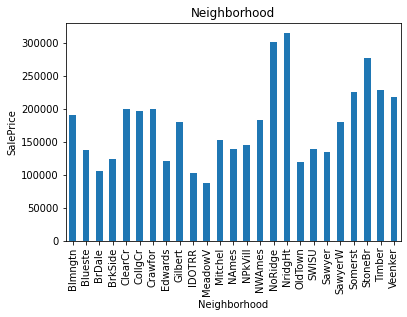

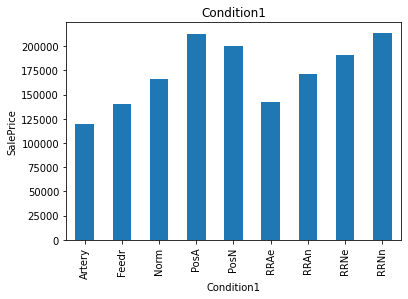

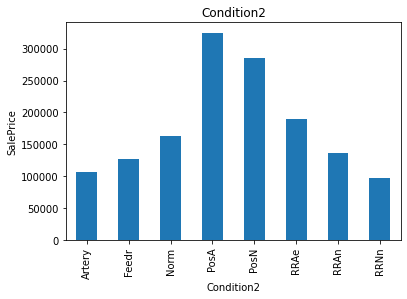

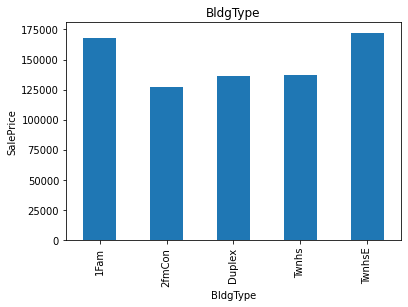

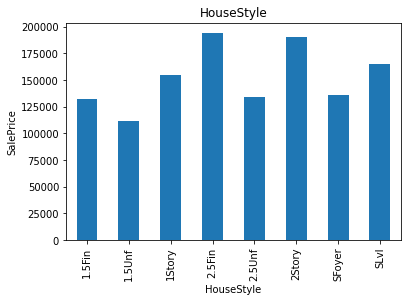

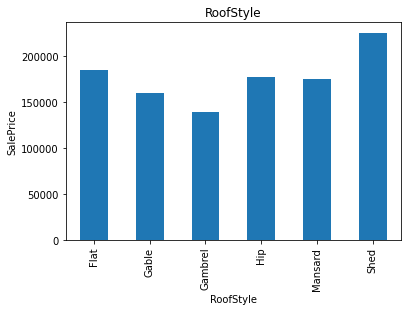

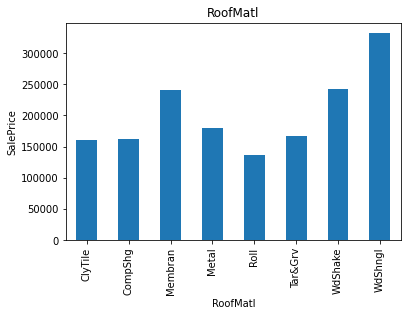

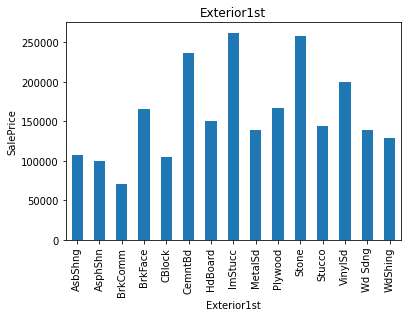

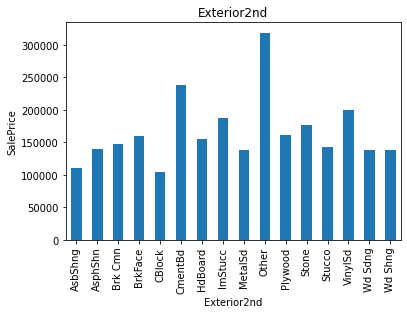

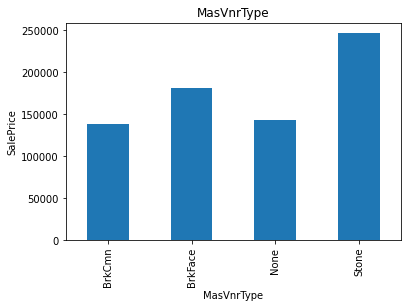

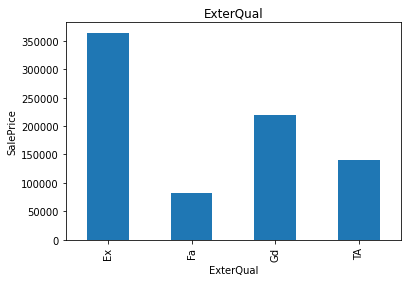

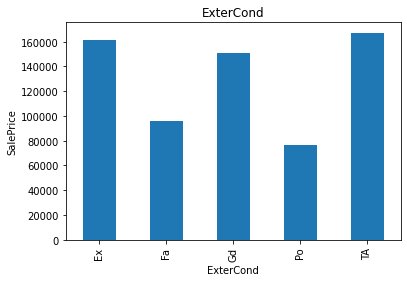

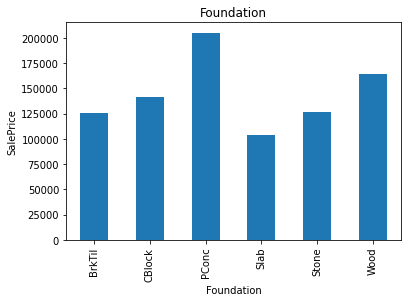

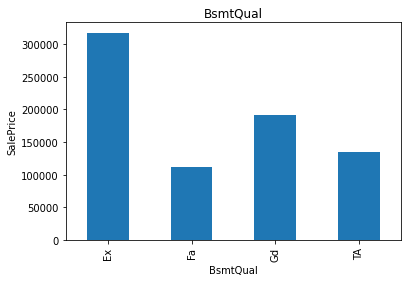

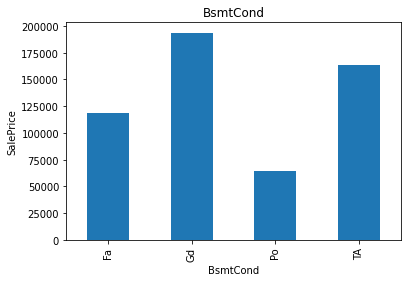

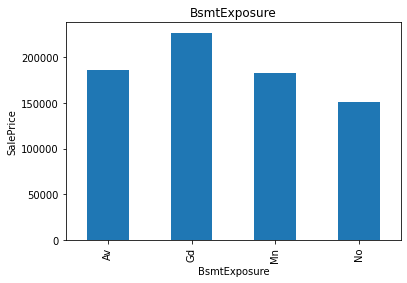

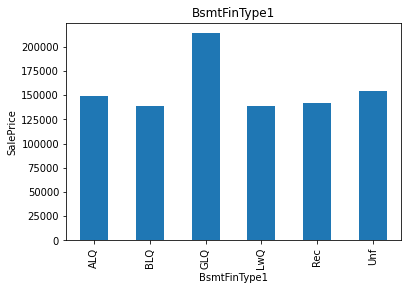

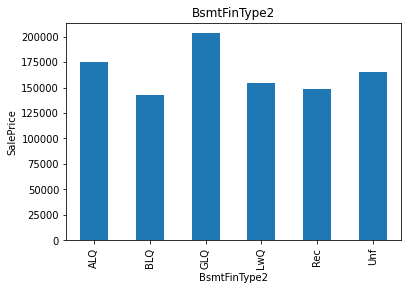

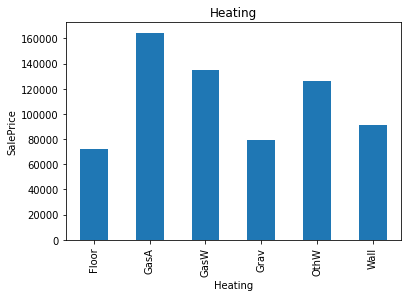

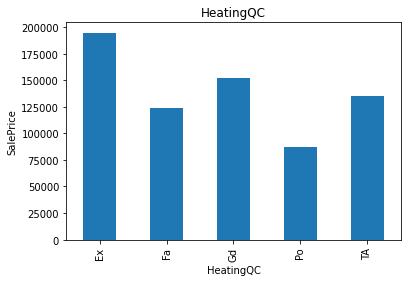

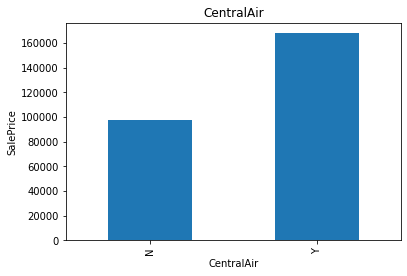

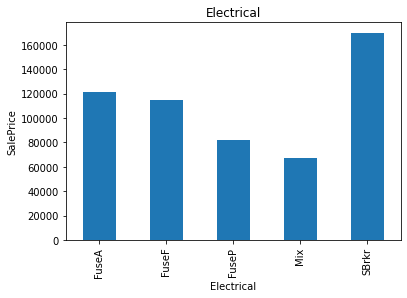

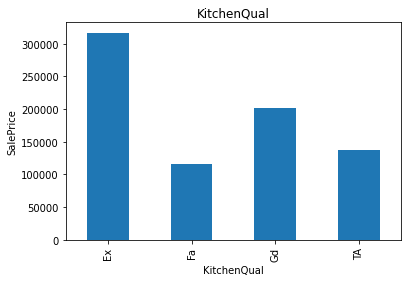

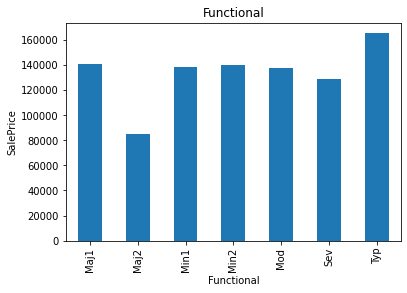

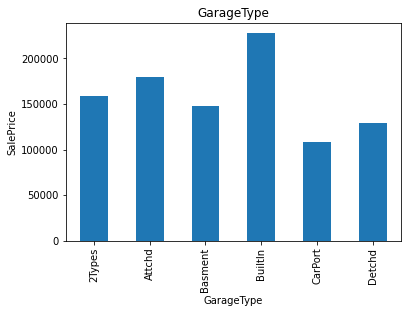

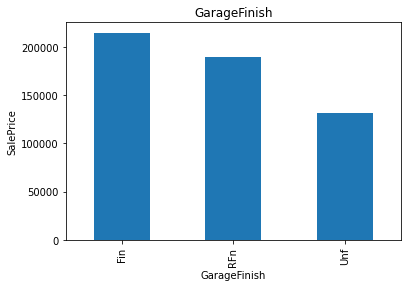

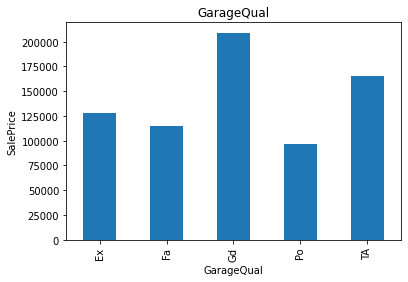

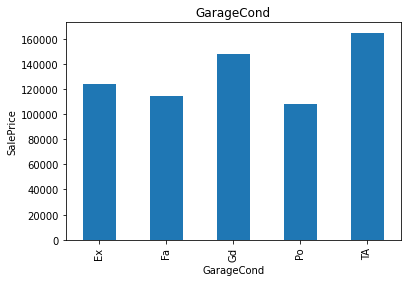

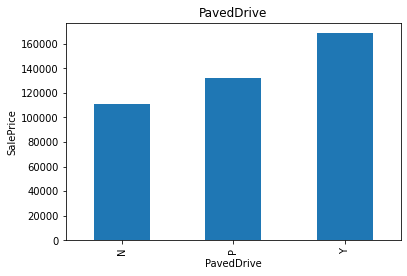

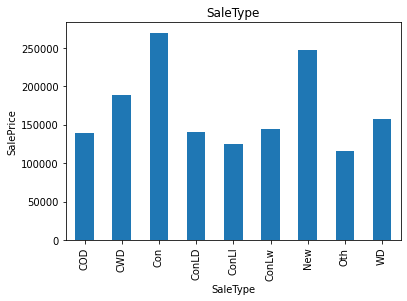

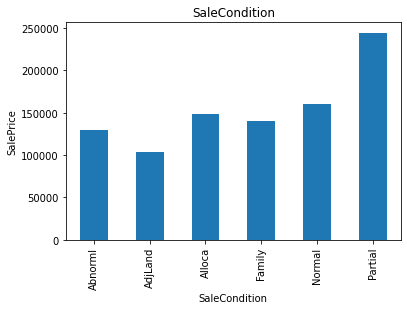

In [42]:
for feature in cat_col:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Observations:
    
    Every categorical feature affecting SalePrice 
    For different classes we have different saleprice

In [43]:
# feature engineering
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:       
    df[feature]=df['YrSold']-df[feature]

In [44]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head(2)

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0


In [45]:
df.drop('Id', axis=1,inplace=True)

#### Encoding

In [46]:
cat_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [47]:
df_encoded = (pd.get_dummies(df[cat_col],drop_first = True))

In [48]:
df = df.drop(columns=list(cat_col))

In [49]:
final_df = pd.concat([df_encoded,df],axis=1)

In [50]:
final_df.shape

(2919, 233)

In [51]:
final_df

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0

In [52]:
# Seperating data into training  dataset
df_ = final_df.iloc[:1460,:]

In [53]:
# accessing X_training data
# final_df.iloc[:1460,:-1]

# accessing X_testing data
# final_df.iloc[1460:,:-1]

# accessing Y_training
# final_df.iloc[:1460,-1]

In [54]:
# Seperating data into training and testing dataset

X_train = final_df.iloc[:1460,:-1]
X_test = final_df.iloc[1460:,:-1]

y_train = final_df.iloc[:1460,-1]

#### Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [56]:
minmax = MinMaxScaler()
std_scaler = StandardScaler()

In [57]:
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax  = minmax.transform(X_test)

X_train_std_scaler = std_scaler.fit_transform(X_train)
X_test_std_scaler  = std_scaler.transform(X_test)

#### Model Building

In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR


In [59]:


def model(model, X_train, y_train, X_test):

    # initializing model
    reg = model()
        
    # fitting model
    reg.fit(X_train, y_train)

    # making prediction
    y_train_pred = reg.predict(X_train)
    global y_test_pred
    y_test_pred = reg.predict(X_test)

   # evaluation matrics
    print('Training data')
    print('R2_score:', round(r2_score(y_train, y_train_pred),2), " | RMSE",np.sqrt(round(mean_squared_error(y_train, y_train_pred),2)) )
    print()

#     print('Testing data')
#     print('R2_score:', round(r2_score(y_test, y_test_pred),2), " | RMSE",np.sqrt(round(mean_squared_error(y_test, y_test_pred),2)))
#     print()
    return model


#### Linear Regression

In [60]:
model(LinearRegression, X_train, y_train, X_test)

Training data
R2_score: 0.93  | RMSE 20940.141965612365



sklearn.linear_model._base.LinearRegression

In [61]:
# linear regression on standard scaler
model(LinearRegression, X_train_std_scaler, y_train, X_test_std_scaler)

Training data
R2_score: 0.93  | RMSE 20940.13535940014



sklearn.linear_model._base.LinearRegression

In [62]:
# linear regression on minmax scaler
model(LinearRegression, X_train_minmax, y_train, X_test_minmax)

Training data
R2_score: 0.93  | RMSE 21038.077407881166



sklearn.linear_model._base.LinearRegression

#### Ridge Regression

In [63]:
model(Ridge, X_train, y_train, X_test)

Training data
R2_score: 0.91  | RMSE 24122.259284528056



sklearn.linear_model._ridge.Ridge

In [64]:
# ridge regression on standard scaler
model(Ridge, X_train_minmax, y_train, X_test_minmax)

Training data
R2_score: 0.91  | RMSE 24249.785686475665



sklearn.linear_model._ridge.Ridge

In [65]:
# ridge regression on minmax scaler
model(Ridge, X_train_minmax, y_train, X_test_minmax)

Training data
R2_score: 0.91  | RMSE 24249.785686475665



sklearn.linear_model._ridge.Ridge

#### Lasso Regressor

In [66]:
model(Lasso, X_train, y_train, X_test)

Training data
R2_score: 0.93  | RMSE 20957.66802318426



sklearn.linear_model._coordinate_descent.Lasso

In [67]:
# lasso regression on minmax scaler
model(Lasso, X_train_minmax, y_train, X_test_minmax)

Training data
R2_score: 0.93  | RMSE 20958.41526952837



sklearn.linear_model._coordinate_descent.Lasso

In [68]:
# Lasso regression on minmax scaler
model(Lasso, X_train_minmax, y_train, X_test_minmax)

Training data
R2_score: 0.93  | RMSE 20958.41526952837



sklearn.linear_model._coordinate_descent.Lasso

#### RandomForestRegressor

In [69]:
model(RandomForestRegressor, X_train, y_train, X_test )

Training data
R2_score: 0.98  | RMSE 11063.006542527217



sklearn.ensemble._forest.RandomForestRegressor

In [70]:
# RandomForestRegressor on minmax scaler
model(RandomForestRegressor, X_train_minmax, y_train, X_test_minmax)

Training data
R2_score: 0.98  | RMSE 11031.7689719283



sklearn.ensemble._forest.RandomForestRegressor

In [71]:
# RandomForestRegressor on standard scaler scaler
model(RandomForestRegressor, X_train_std_scaler, y_train, X_test_std_scaler)

Training data
R2_score: 0.98  | RMSE 10980.470459411108



sklearn.ensemble._forest.RandomForestRegressor

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
# hyper parameter tunig for random forest
params =  {
 'max_depth': [2,3,4,5,6,7,10],
 'min_samples_leaf': [4, 6, 8],
 'min_samples_split': [5, 7,10],
 'n_estimators': [100,300, 500]}

reg = RandomForestRegressor()

model_reg = RandomizedSearchCV(estimator = reg, param_distributions = params, n_iter = 10,
                           cv = 5, verbose= 1, random_state= 101, n_jobs = -1)
model_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=101, verbose=1)

In [75]:
model_reg.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 7}

In [76]:
model_reg.best_score_


0.8441776129696752

In [78]:
y_test_pred = model_reg.predict(X_test)


In [80]:
# create sample submission file and submit
pred = pd.DataFrame(y_test_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_rf.csv',index=False)

#### XGBRegressor

In [81]:
model(xgb.XGBRegressor, X_train, y_train, X_test )

Training data
R2_score: 1.0  | RMSE 1720.6611287525502



xgboost.sklearn.XGBRegressor

In [82]:
# XGBregressor on minmax scaler
model(xgb.XGBRegressor, X_train_minmax, y_train, X_test_minmax)

Training data
R2_score: 1.0  | RMSE 1720.6611287525502



xgboost.sklearn.XGBRegressor

In [83]:
# XGBregressor on standard scaler scaler
model(xgb.XGBRegressor, X_train_std_scaler, y_train, X_test_std_scaler)

Training data
R2_score: 1.0  | RMSE 1720.6611287525502



xgboost.sklearn.XGBRegressor

In [84]:
## Hyper Parameter Optimization


params = {
    'n_estimators' : [100,300,500],
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    'max_depth' : [2, 3, 5, 10, 15],
    "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'min_child_weight' : [1,2,3,4]
}

In [85]:
# Set up the random search with cross validation

from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(xgb.XGBRegressor(),
            param_distributions=params,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_score_

In [ ]:
y_test_pred = random_cv.predict(X_test)

#### Submission file

In [ ]:
import pickle
filename='finalized_model.pkl'
pickle.dump(random_cv, open(filename, 'wb'))

In [ ]:
y_test_pred

In [ ]:
# create sample submission file and submit
pred = pd.DataFrame(y_test_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)